In [4]:
from dotenv import load_dotenv
import os
import pandas as pd
import re

load_dotenv()

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

from openai import OpenAI
client = OpenAI()

In [1]:
emotions = ['Admiração', 'Diversão', 'Raiva', 'Aborrecimento', 'Aprovação', 'Confusão', 'Curiosidade', 'Desejo', 'Decepção', 'Nojo', 'Vergonha', 'Entusiasmo', 'Medo', 'Gratidão', 'Luto', 'Alegria', 'Amor', 'Nervosismo', 'Otimismo', 'Orgulho', 'Alívio', 'Remorso', 'Tristeza', 'Surpresa', 'Saudade', 'Inveja', 'Compaixão', 'Desaprovação', 'Outros']

In [ ]:
# df_test = pd.read_csv('./../test.csv', sep='\t', quoting=3 , engine='python')

In [ ]:
# df_test['response_text'] = ''

In [ ]:
for idx, row in df_test.iterrows():

    if row['response_text'] == '':

        prompt = f"Considerando as emoções {emotions}, quais emoções estão presentes no seguinte texto: \n \n{row['tweet']}.\n\n Responda apenas com as emoções separadas por vírgulas"

        # response = client.chat.completions.create(
        #     model="gpt-4o",
        #     messages=[
        #         {"role": "system", "content": "You are an expert in emotions."},
        #         {
        #             "role": "user",
        #             "content": prompt
        #         }
        #     ]
        # )

        print(idx, response.choices[0].message.content)

        df_test.at[idx, 'response_text'] = re.sub(r'\n', '', response.choices[0].message.content)
        df_test.to_csv('df_test_with_response.csv', index=False, sep='\t', quoting=3)

0 Diversão, Aborrecimento, Aprovação, Desaprovação
1 Admiração, Inveja, Desaprovação
2 Nojo, Aborrecimento, Raiva, Tristeza, Desaprovação
3 Raiva, Nojo, Desaprovação
4 Tristeza
5 Gratidão, Amor
6 Alegria, Desejo, Entusiasmo.
7 Tristeza
8 Confusão, Decepção, Aborrecimento, Tristeza
9 Diversão, Alegria
10 Nojo, Desaprovação
11 Curiosidade, Amor, Entusiasmo
12 Raiva, Aborrecimento, Medo, Nojo, Desaprovação
13 Admiração, Otimismo
14 Desaprovação, Tristeza, Remorso, Desespero
15 Amor, Desejo, Otimismo, Saudade
16 Raiva, Aborrecimento, Desaprovação
17 Raiva, Aborrecimento, Desaprovação
18 Aborrecimento, Curiosidade, Desejo
19 Admiração, Alegria, Orgulho
20 Desaprovação, Desdém
21 Entusiasmo, Alegria, Otimismo, Nervosismo
22 Nervosismo, Saudade, Confusão, Diversão
23 Gratidão, Diversão, Alegria
24 Diversão, Amor
25 Tristeza, Decepção, Aborrecimento
26 Tristeza
27 Amor, Alegria
28 Remorso, Tristeza, Saudade
29 Curiosidade, Surpresa, Otimismo
30 Raiva, Aborrecimento, Desaprovação
31 Diversão, D

In [ ]:
df = pd.read_csv('./chatgpt_emotion_analysis.csv', sep='\t', quoting=3 , engine='python')

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
df['predicted'] = ''
emotions_to_idx = {emotion: idx for idx, emotion in enumerate(emotions)}

print(emotions_to_idx)

for idx, row in df.iterrows():

    words = row['response_text'].split(', ')
    predicted = []

    for word in words:
        if word in emotions:
            predicted.append(emotions_to_idx[word])
        else:
            predicted.append(28)

    df.at[idx, 'predicted'] = predicted

{'Admiração': 0, 'Diversão': 1, 'Raiva': 2, 'Aborrecimento': 3, 'Aprovação': 4, 'Confusão': 5, 'Curiosidade': 6, 'Desejo': 7, 'Decepção': 8, 'Nojo': 9, 'Vergonha': 10, 'Entusiasmo': 11, 'Medo': 12, 'Gratidão': 13, 'Luto': 14, 'Alegria': 15, 'Amor': 16, 'Nervosismo': 17, 'Otimismo': 18, 'Orgulho': 19, 'Alívio': 20, 'Remorso': 21, 'Tristeza': 22, 'Surpresa': 23, 'Saudade': 24, 'Inveja': 25, 'Compaixão': 26, 'Desaprovação': 27, 'Outros': 28}


In [8]:
df['categoria'] = df['categoria'].str.split(',').apply(lambda x: [int(i) for i in x])
df[['predicted', 'categoria']]

,predicted,categoria
0,"[1, 3, 4, 27]",[27]
1,"[0, 25, 27]","[25, 27]"
2,"[9, 3, 2, 22, 27]",[9]
3,"[2, 9, 27]",[2]
4,[22],[22]
...,...,...
1770,"[9, 27]",[9]
1771,"[11, 10, 20]",[11]
1772,"[24, 1, 15, 22]",[24]
1773,"[22, 16, 28]",[18]


In [9]:
mlb = MultiLabelBinarizer(classes=range(29))

categoria_bin = mlb.fit_transform(df['categoria'])
predicted_bin = mlb.transform(df['predicted'])

In [10]:
categoria_bin[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0])

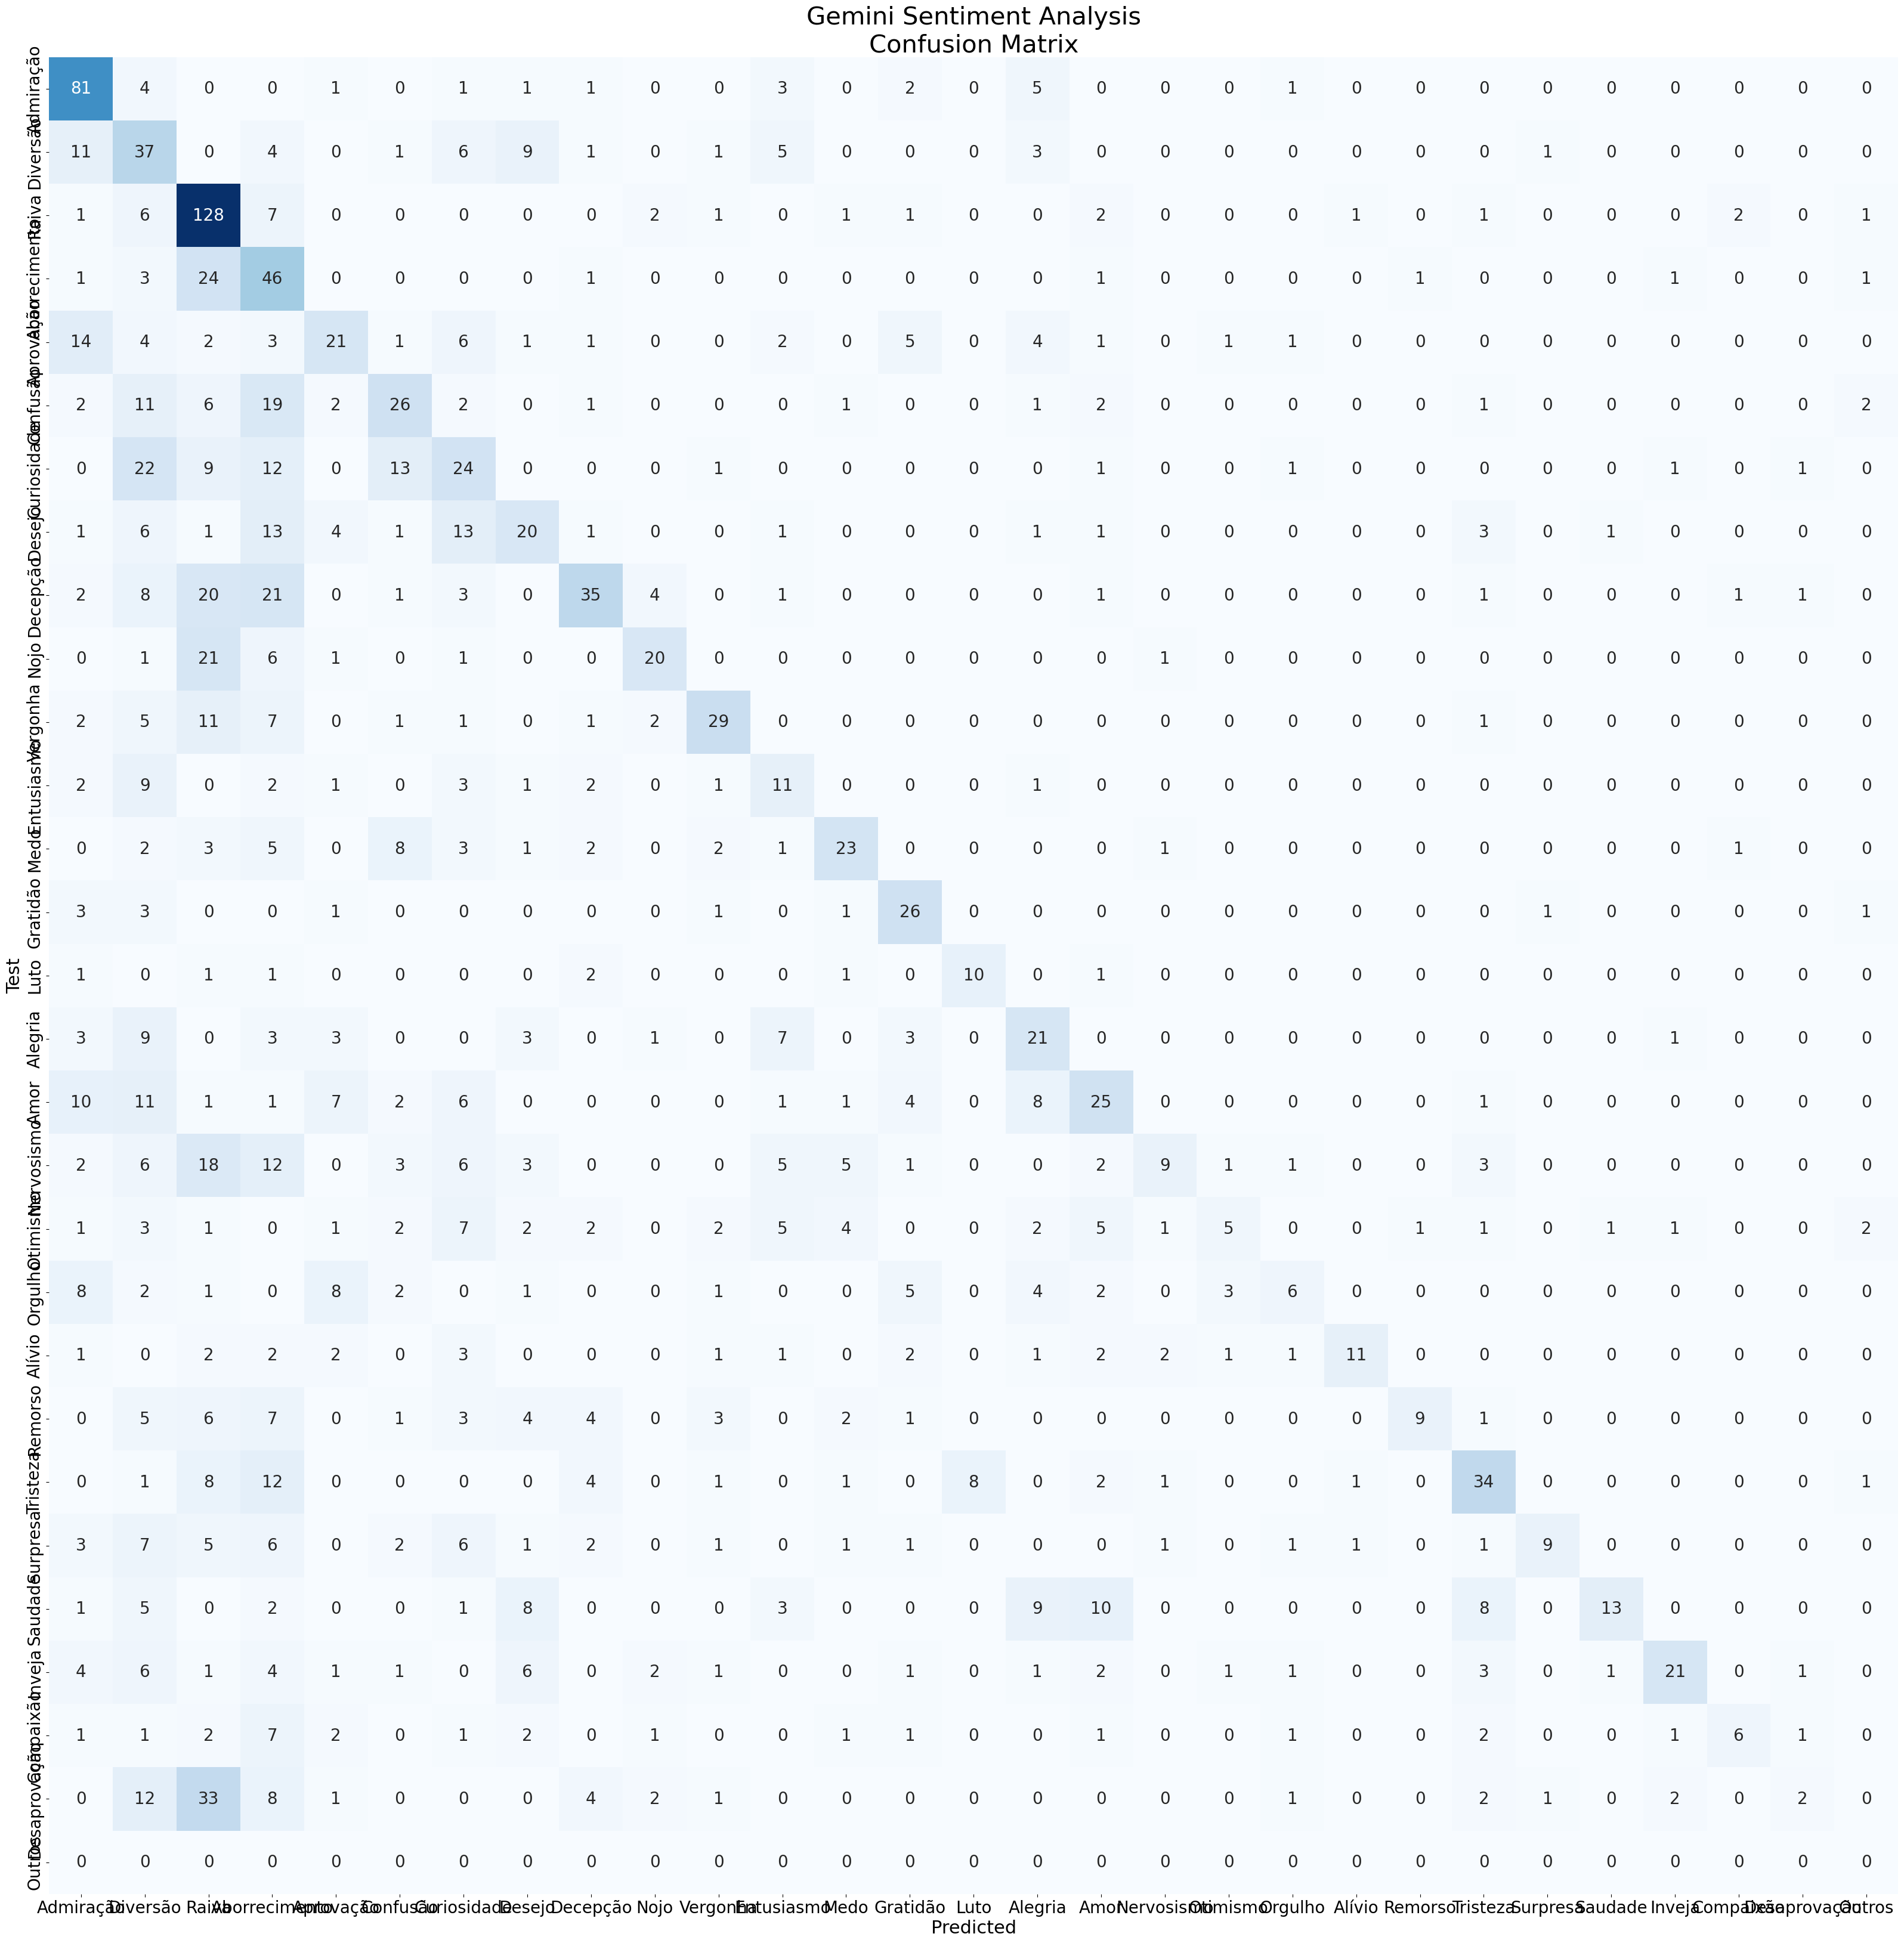

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax =plt.subplots(figsize=(40,40))
labels=emotions
ax=sns.heatmap(confusion_matrix(categoria_bin.argmax(axis=1), predicted_bin.argmax(axis=1)), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":20})
plt.title('Gemini Sentiment Analysis\nConfusion Matrix', fontsize=30)
ax.xaxis.set_ticklabels(labels, fontsize=20) 
ax.yaxis.set_ticklabels(labels, fontsize=20)
ax.set_ylabel('Test', fontsize=22)
ax.set_xlabel('Predicted', fontsize=22)
plt.show()

In [12]:
print('\tClassification Report for Gemini:\n\n',classification_report(categoria_bin.argmax(axis=1), predicted_bin.argmax(axis=1), target_names=emotions))

	Classification Report for Gemini:

                precision    recall  f1-score   support

    Admiração       0.52      0.81      0.64       100
     Diversão       0.20      0.47      0.28        79
        Raiva       0.42      0.83      0.56       154
Aborrecimento       0.22      0.58      0.32        79
    Aprovação       0.38      0.31      0.34        67
     Confusão       0.40      0.34      0.37        76
  Curiosidade       0.25      0.28      0.27        85
       Desejo       0.32      0.30      0.31        67
     Decepção       0.55      0.35      0.43        99
         Nojo       0.59      0.39      0.47        51
     Vergonha       0.62      0.48      0.54        60
   Entusiasmo       0.24      0.33      0.28        33
         Medo       0.55      0.44      0.49        52
     Gratidão       0.49      0.70      0.58        37
         Luto       0.56      0.59      0.57        17
      Alegria       0.34      0.39      0.37        54
         Amor       0.41   

/usr/local/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
